In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
pd.set_option('display.max_colwidth', None)
pd.set_option('display.width', 1000)
file_path = '/content/drive/My Drive/dataset/Amazon.csv'
df = pd.read_csv(file_path)
print(df.shape)
print(df.dtypes)
print(df.isna().sum())
df.head()

(100000, 20)
OrderID           object
OrderDate         object
CustomerID        object
CustomerName      object
ProductID         object
ProductName       object
Category          object
Brand             object
Quantity           int64
UnitPrice        float64
Discount         float64
Tax              float64
ShippingCost     float64
TotalAmount      float64
PaymentMethod     object
OrderStatus       object
City              object
State             object
Country           object
SellerID          object
dtype: object
OrderID          0
OrderDate        0
CustomerID       0
CustomerName     0
ProductID        0
ProductName      0
Category         0
Brand            0
Quantity         0
UnitPrice        0
Discount         0
Tax              0
ShippingCost     0
TotalAmount      0
PaymentMethod    0
OrderStatus      0
City             0
State            0
Country          0
SellerID         0
dtype: int64


,OrderID,OrderDate,CustomerID,CustomerName,ProductID,ProductName,Category,Brand,Quantity,UnitPrice,Discount,Tax,ShippingCost,TotalAmount,PaymentMethod,OrderStatus,City,State,Country,SellerID
0,ORD0000001,2023-01-31,CUST001504,Vihaan Sharma,P00014,Drone Mini,Books,BrightLux,3,106.59,0.00,0.00,0.09,319.86,Debit Card,Delivered,Washington,DC,India,SELL01967
1,ORD0000002,2023-12-30,CUST000178,Pooja Kumar,P00040,Microphone,Home & Kitchen,UrbanStyle,1,251.37,0.05,19.10,1.74,259.64,Amazon Pay,Delivered,Fort Worth,TX,United States,SELL01298
2,ORD0000003,2022-05-10,CUST047516,Sneha Singh,P00044,Power Bank 20000mAh,Clothing,UrbanStyle,3,35.03,0.10,7.57,5.91,108.06,Debit Card,Delivered,Austin,TX,United States,SELL00908
3,ORD0000004,2023-07-18,CUST030059,Vihaan Reddy,P00041,Webcam Full HD,Home & Kitchen,Zenith,5,33.58,0.15,11.42,5.53,159.66,Cash on Delivery,Delivered,Charlotte,NC,India,SELL01164
4,ORD0000005,2023-02-04,CUST048677,Aditya Kapoor,P00029,T-Shirt,Clothing,KiddoFun,2,515.64,0.25,38.67,9.23,821.36,Credit Card,Cancelled,San Antonio,TX,Canada,SELL01411


# Analysis: Explore buying trends for Category attribute throughout the OrderDate

In [ ]:
# Group data by OrderDate then group again by month-year as day is too granular for analysis

In [ ]:
df_pivot = df.pivot_table(
    index='OrderDate',      # rows
    columns='Category',     # columns
    aggfunc='size',         # count number of occurrences
    fill_value=0            # fill missing combinations with 0
)
df_pivot.reset_index(inplace=True)
df_pivot.columns.name = None
df_pivot['OrderDate'] = pd.to_datetime(df_pivot['OrderDate'])
df_pivot = df_pivot.groupby(pd.Grouper(key='OrderDate',freq='ME')).sum()
df_pivot.reset_index(inplace=True)
df_pivot.columns.name = None
df_pivot.head()

,OrderDate,Books,Clothing,Electronics,Home & Kitchen,Sports & Outdoors,Toys & Games
0,2020-01-31,288,278,295,282,307,280
1,2020-02-29,246,265,230,258,235,256
2,2020-03-31,270,297,306,268,284,260
3,2020-04-30,271,279,297,275,275,295
4,2020-05-31,257,287,280,298,276,274


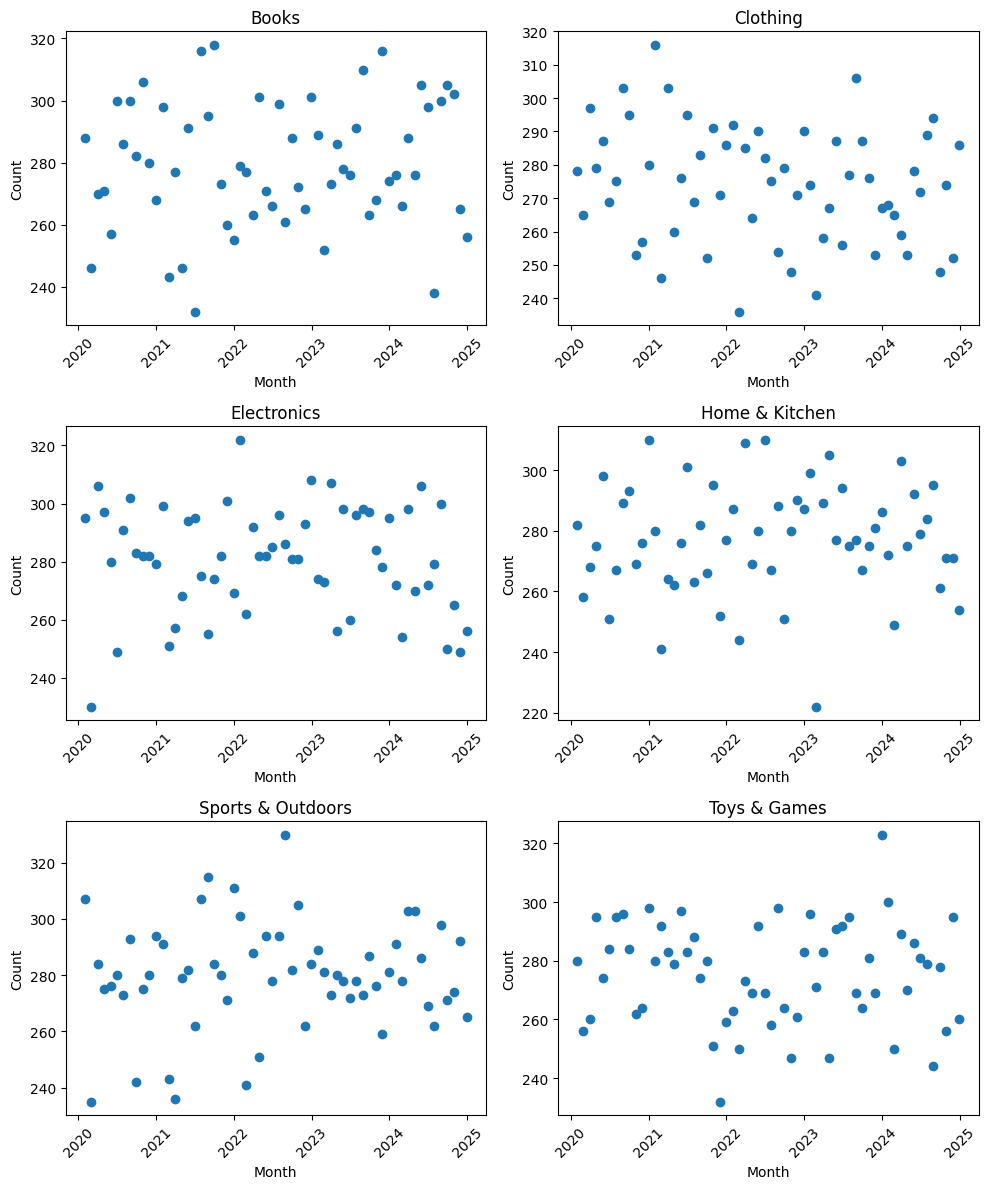

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

cat = [x for x in df_pivot.columns[1:]]
fig, axs = plt.subplots(3, 2, figsize=(10,12))

for i, cat in enumerate(cat):
    row = i // 2
    col = i % 2
    axs[row, col].scatter(df_pivot['OrderDate'], df_pivot[cat])
    axs[row, col].set_title(cat)
    axs[row, col].set_xlabel('Month')
    axs[row, col].set_ylabel('Count')
    axs[row, col].tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()


In [ ]:
# Findings:
# 1. No specific popular category seen from the scatters in anytime as all categories seem randomly distributed
# 2. However, all categories have a frequent count between 260-300


# Payment stats exploration

In [ ]:
display(df['PaymentMethod'].value_counts())
display(df['Country'].value_counts())

,count
PaymentMethod,
Credit Card,35038
Debit Card,20024
UPI,15066
Amazon Pay,15017
Net Banking,9927
Cash on Delivery,4928


,count
Country,
United States,70058
India,15051
Canada,5818
United Kingdom,4943
Australia,4130


In [ ]:
df.groupby(['PaymentMethod', 'Country']).size().to_frame('Count').sort_values(['PaymentMethod', 'Count'], ascending=[True, False])

Count
PaymentMethod    Country              
Amazon Pay       United States   10559
                 India            2257
                 Canada            850
                 United Kingdom    732
                 Australia         619
Cash on Delivery United States    3405
                 India             780
                 Canada            295
                 United Kingdom    229
                 Australia         219
Credit Card      United States   24585
                 India            5223
                 Canada           2018
                 United Kingdom   1737
                 Australia        1475
Debit Card       United States   14002
                 India            2996
                 Canada           1178
                 United Kingdom   1004
                 Australia         844
Net Banking      United States    6975
                 India            1492
                 Canada            600
                 United Kingdom    474
                 Australia         386
UPI              United States   10532
                 India            2303
                 Canada            877
                 United Kingdom    767
                 Australia         587

In [ ]:
# Findings: Credit/Debit card most preferred method of payment